# PREGUNTAS DE LA EMPRESA (en este caso SPOTYFI)

* cuales son los generos y cual el mas escuchado
* cual es la duracion media de las canciones 
* lista de los temas mas escuchados 
* Correlacion de los datos 
* Qué características son necesarias para que una pista se convierta en un éxito?
* Es más popular una canción que suena más feliz y eufórica que una que suena más triste o enojada?
* Qué características son necesarias para que una pista sea bailable.

* en las próximas celdas, haremos preparaciones básicas de datos:
    * 1. cambia la duración a minutos
    * 2. limpia la columna de artistas quitando los corchetes

----
# RESPUESTAS

----
* **Se puede decir que creamos un modelo predictivo de una efectividad casi perfecta, se dice que una cancion para ser medianamente exitosa tiene que tener Danceability & valence bien correlacionados y elevados**
---
* **Tiene un incremento de 3.8 de popularidad cada tema que contenga energy y loudness compatibles**
----
* **LA PROBABILIDAD DE QUE UN TEMA SEA 100% POPULAR ENTRE 34000 ES DE 7,8%**
----
* **La media de cada tema es de 3.8 minutos y 3.5' es la moda**
* **tenemos 104253 canciones no explicitas y 9747 explicitas (el 8,5% de las canciones si lo son)**
----
* **En la linea 14 esta explicado graficamente la correlacion correspondiente entre los datos**
    * 1. **LOUDNES y ENERGY** tienen una alta correlación 0.76 (una de las mayores)
    * 2. **VALENCE y DANCEABILITY** tienen una alta correlación entre si 0.48
    * 3. **ENERGY Y ACOUSTICNESS** tiene una correlación muy negativa entre si -0.73 luego con **LOUDNESS** un -0.59
----
* **En la linea 17 Encontramos el top 20 de las canciones mas escuchadas** (Aqui pondremos lo 3 mas escuchados)
    * 1- Unholy (feat. Kim Petras)
    * 2- Quevedo: Bzrp Music Sessions, Vol. 52
    * 3- La Bachata
----
* **En la linea 19 encontraremos el top 20 de los artistas mas escuchados** (Aqui pondremos los 3 mas escuchados)
    * 1- The Beatles
    * 2- Linkin Park  
    * 3- BTS              
----

* **En la linea 21 encontraremos el top 10 de los albunes mas escuchados** (Aqui pondremos los 3 mas escuchados)
    * 1- Un Verano Sin Ti         
    * 2- OzuTochi                 
    * 3- Greatest Hits
-----
* **En la linea 22 encontraremos el top 10 de los generos mas escuchados** (Aqui pondremos los 3 mas escuchados)
    * 1- pop-film        
    * 2- k-pop            
    * 3- chill             
---
* **Prediccion del modelo en Linea 29 en adelante**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
data = pd.read_csv("../MisPracticas/Datasets/dataset-spotyfi.csv")
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
data.shape , data.columns

((114000, 21),
 Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
        'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
        'key', 'loudness', 'mode', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
        'track_genre'],
       dtype='object'))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
#vemos si hay datos faltantes 
data.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>]],
      dtype=object)

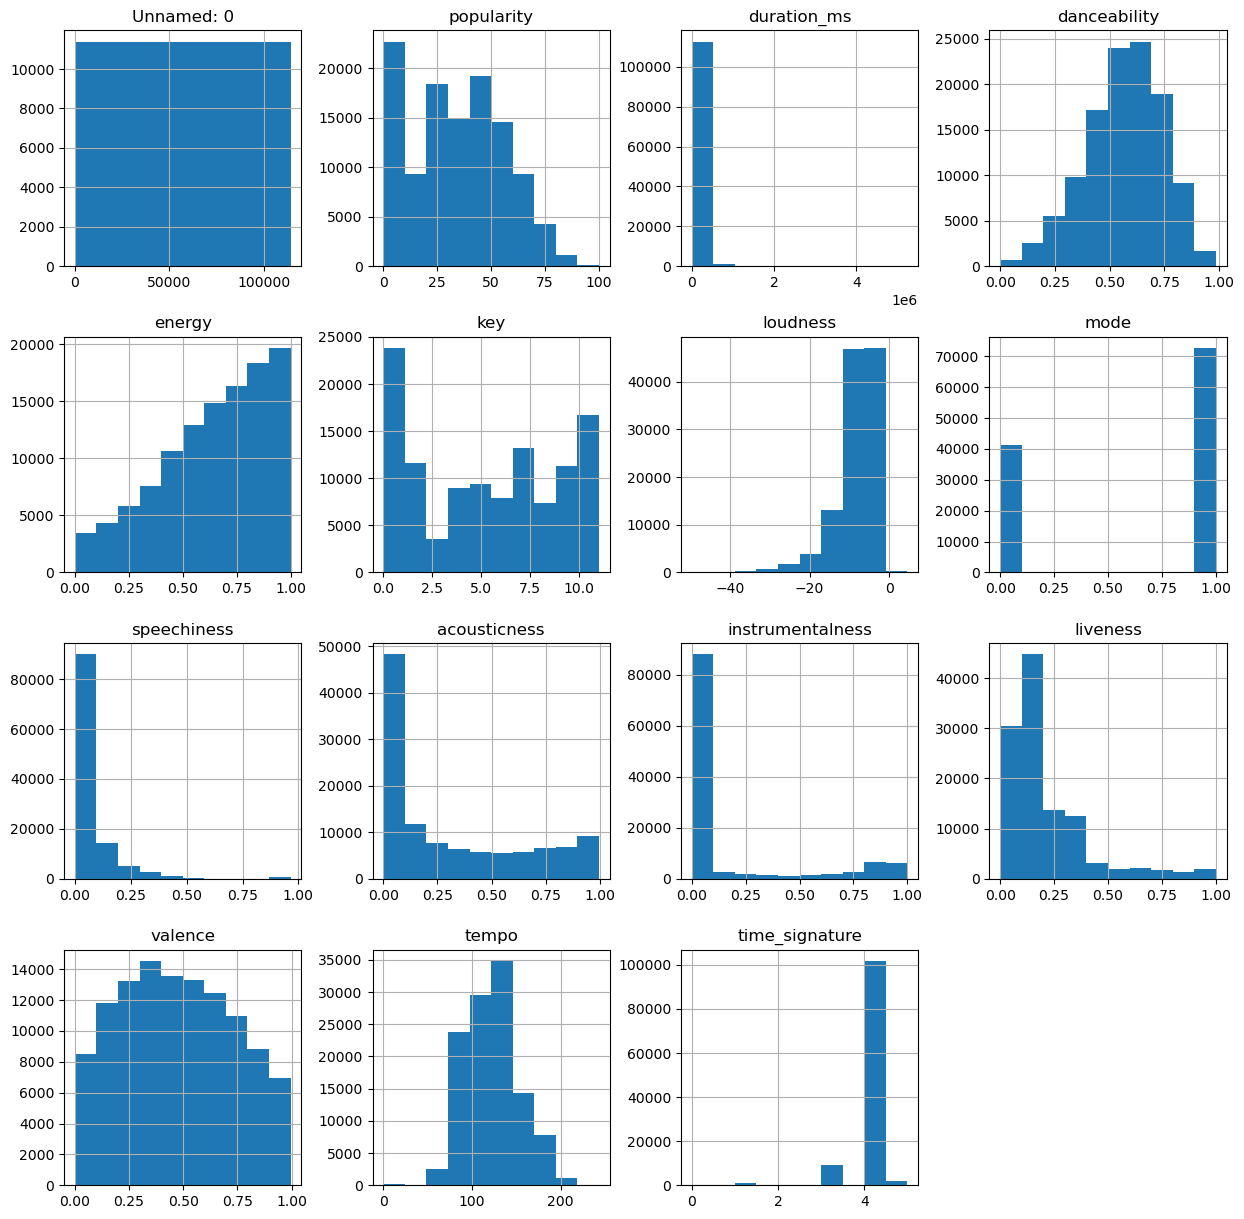

In [6]:
data.hist(figsize=(15, 15))

In [7]:
data['duration_min'] = data['duration_ms']/60000
data['duration_min'] = data['duration_min'].round(1)
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.8
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.5
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.5
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.4
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.3


Pasamos las canciones a minutos para saber bien cuanto dura cada una de ellas
* Vemos que la media de cada tema es de 3.8 minutos o 3.5 que es la moda 

In [8]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,3.800492
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,1.788431
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,2.900000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,3.500000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,4.400000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.300000


In [9]:
#Remplazamos quitamos algunos corchetes de los artistas para que quede mas limpio

data["artists"]=data["artists"].str.replace("[", "")
data["artists"]=data["artists"].str.replace("]", "")
data["artists"]=data["artists"].str.replace("'", "")

C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\2549644387.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["artists"]=data["artists"].str.replace("[", "")
C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\2549644387.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["artists"]=data["artists"].str.replace("]", "")


In [10]:
#Eliminamos la columna de duraciones por MS ya que la pasamos a minutos 
data.drop(['duration_ms'],inplace=True,axis=1)

In [11]:
duplicate_names = data[data.duplicated(['artists','track_name','duration_min'])]
duplicate_names.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
18,18,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,68,False,0.625,0.414,0,...,1,0.0369,0.294,0.000000,0.1510,0.6690,130.088,4,acoustic,3.2
20,20,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,False,0.703,0.444,11,...,1,0.0417,0.559,0.000000,0.0973,0.7120,150.960,4,acoustic,4.0
22,22,5TvE3pk05pyFIGdSY9j4DJ,A Great Big World;Christina Aguilera,Is There Anybody Out There? - Track by Track C...,Say Something,70,False,0.407,0.147,2,...,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic,3.8
28,28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,False,0.620,0.309,5,...,1,0.0495,0.788,0.000000,0.1460,0.6640,145.363,4,acoustic,2.2
29,29,2qESE1ZeWly7I3YjyTXmXh,Jason Mraz,Perfect Christmas Hits,Winter Wonderland,0,False,0.620,0.309,5,...,1,0.0495,0.788,0.000000,0.1460,0.6640,145.363,4,acoustic,2.2


* en teoria Tenemos 32092 duplicados

In [12]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.8
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.5
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.5
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.4
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.3


C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\3855499087.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['valence'],ax=ax[0,0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\3855499087.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['tempo'],ax=ax[0,1])
C:\Users\Acer\AppD

<AxesSubplot:xlabel='key', ylabel='Density'>

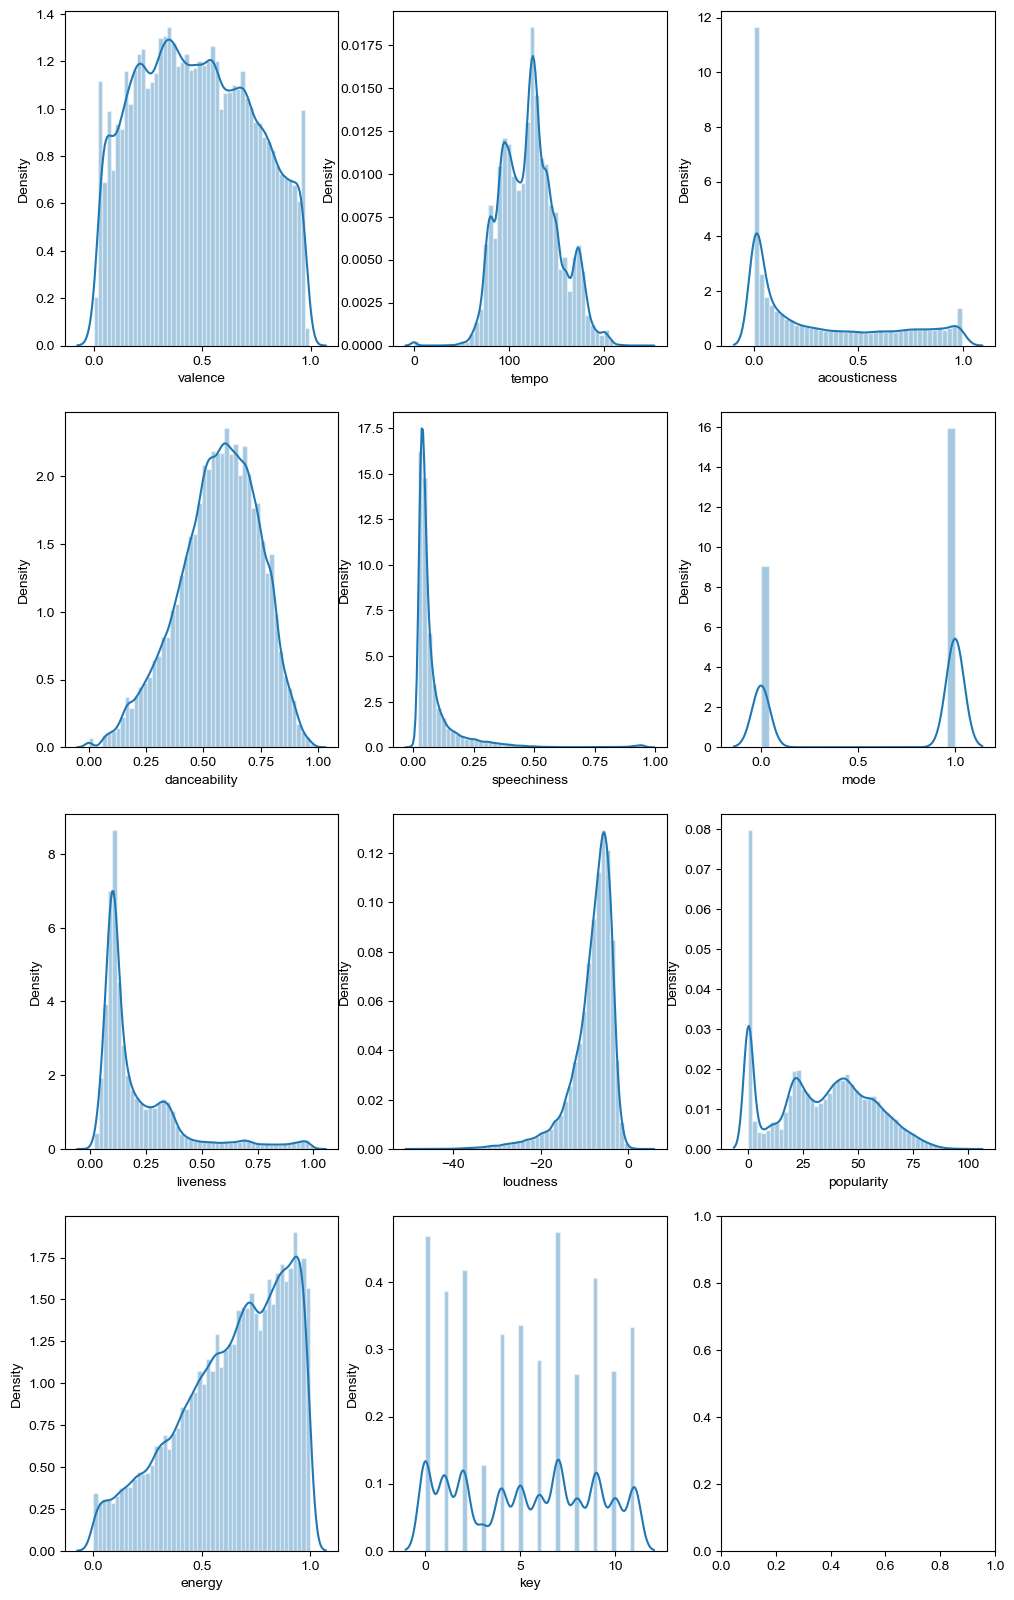

In [13]:
#Hacemos otra vista exploratoria y grafica de los datos para verlos mas claros
import seaborn as sns

fig,ax = plt.subplots(4,3,figsize=(12,20))
sns.set(font_scale = 1)
sns.distplot(data['valence'],ax=ax[0,0])
sns.distplot(data['tempo'],ax=ax[0,1])
sns.distplot(data['acousticness'],ax=ax[0,2])
sns.distplot(data['danceability'],ax=ax[1,0])
sns.distplot(data['speechiness'],ax=ax[1,1])
sns.distplot(data['mode'],ax=ax[1,2])
sns.distplot(data['liveness'],ax=ax[2,0])
sns.distplot(data['loudness'],ax=ax[2,1])
sns.distplot(data['popularity'],ax=ax[2,2])
sns.distplot(data['energy'],ax=ax[3,0])
sns.distplot(data['key'],ax=ax[3,1])

### Puntos clave:
*  las columnas como energía y valance tienen una alta variabilidad
* Las columnas como vivacidad, bailabilidad, tempo y volumen tienen una variabilidad relativamente menor y se concentran en algunos rangos.

----

# CORRELACION

In [14]:
# analicemos la correlación entre columnas

data.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\1141150654.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
Unnamed: 0,1.000000,0.032142,-0.054736,0.003444,-0.055994,-0.005520,-0.027307,0.005107,-0.084952,0.076840,-0.070286,0.033639,0.053111,-0.025824,-0.021115,-0.032821
popularity,0.032142,1.000000,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073,-0.007165
explicit,-0.054736,0.044082,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386,-0.065285
danceability,0.003444,0.035448,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218,-0.073433
energy,-0.055994,0.001056,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126,0.058498
key,-0.005520,-0.003853,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065,0.008086
loudness,-0.027307,0.050423,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992,-0.003431
mode,0.005107,-0.013931,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092,-0.035590
speechiness,-0.084952,-0.044927,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011,-0.062609
acousticness,0.076840,-0.025472,-0.094403,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138,-0.103765


C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\2650324643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


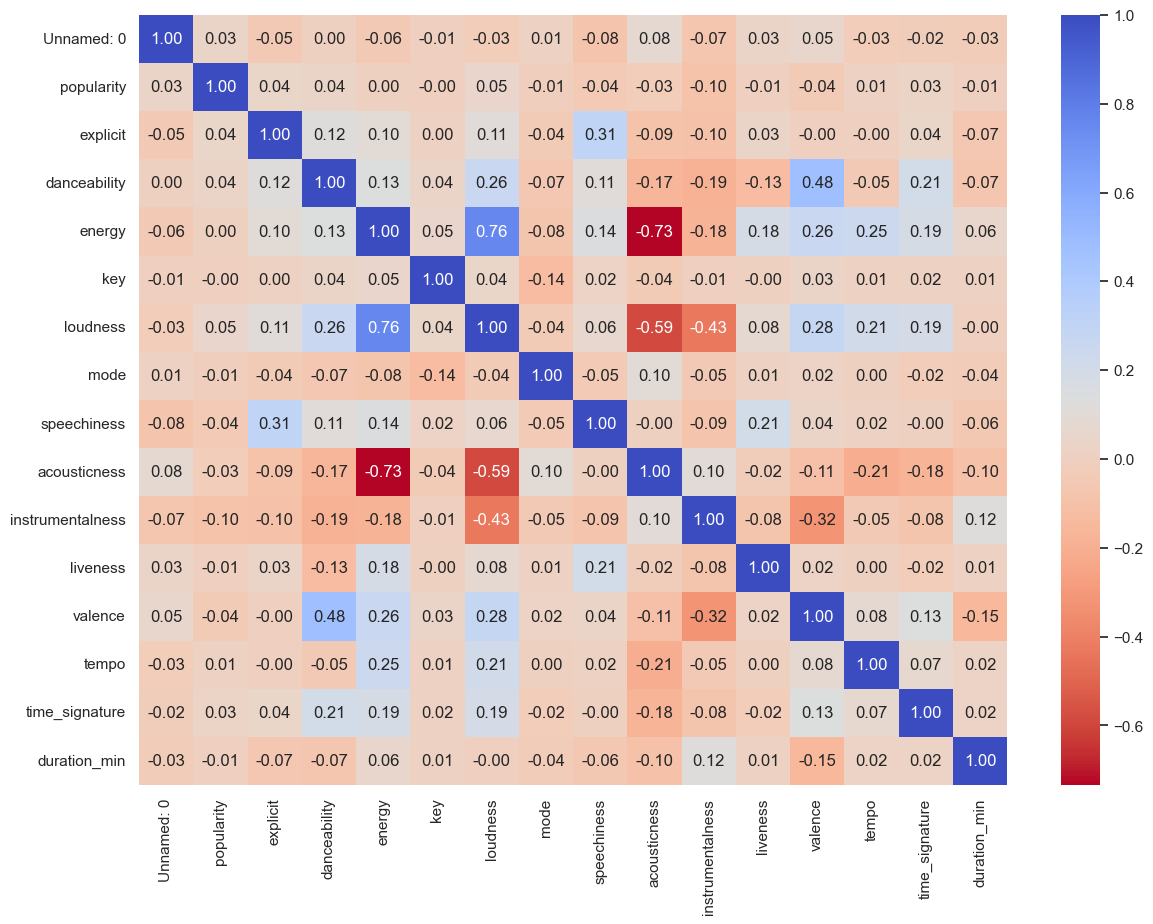

In [15]:
corr_mat = data.corr()
plt.figure(figsize = (14, 10))
sns.heatmap(corr_mat,
            annot=True,
            fmt='.2f',
            cmap=plt.cm.coolwarm_r,
           )
plt.show()

**Ahora la veremos de forma grafica para que se entienda mejor**
**Estas son las Conclusiones clave de si hay o no correlacion entres las variables:**

* 1. el **LOUDNES y ENERGY** tienen una alta correlación 0.76 (una de las mayores por asi decirlo)
* 2. el **VALENCE y DANCEABILITY** tienen una alta correlación entre si tmb 0.48
* 3. la **ENERGY Y ACOUSTICNESS** tiene una correlación muy negativa entre si -0.73 luego con **LOUDNESS** un -0.59

In [16]:
#Ahora normalizaremos de una simple manera

media_tempo = 122.147
max_tempo = 243.372
std_tempo = 29.97819

zz = (max_tempo -media_tempo)
zz_div = zz / std_tempo

print("La distribucion normal es = ",zz_div)
print("Valor en la tabla de distribucion normal",0.99997)
print("La probabilidad de TEMPO sea menor a la MAXIMA es = %",99.997)
print("La probabilidad de que supere la MAXIMA es de = %",0.003)

La distribucion normal es =  4.043773156418049
Valor en la tabla de distribucion normal 0.99997
La probabilidad de TEMPO sea menor a la MAXIMA es = % 99.997
La probabilidad de que supere la MAXIMA es de = % 0.003


In [17]:
top_ten_tracks = data.groupby("track_name")['popularity'].mean().sort_values(ascending=False).head(20)
top_ten_tracks.head(20)

track_name
Unholy (feat. Kim Petras)                         100.0
Quevedo: Bzrp Music Sessions, Vol. 52              99.0
La Bachata                                         98.0
Tití Me Preguntó                                   97.0
Me Porto Bonito                                    97.0
Efecto                                             95.5
Ojitos Lindos                                      94.5
Moscow Mule                                        94.0
Neverita                                           93.0
CUFF IT                                            93.0
Calm Down (with Selena Gomez)                      92.0
I Wanna Be Yours                                   92.0
Tarot                                              91.0
LOKERA                                             91.0
Jimmy Cooks (feat. 21 Savage)                      91.0
Caile                                              90.5
STAR WALKIN' (League of Legends Worlds Anthem)     90.0
Sex, Drugs, Etc.                     

* Aca obtenemos las 20 canciones mas populares

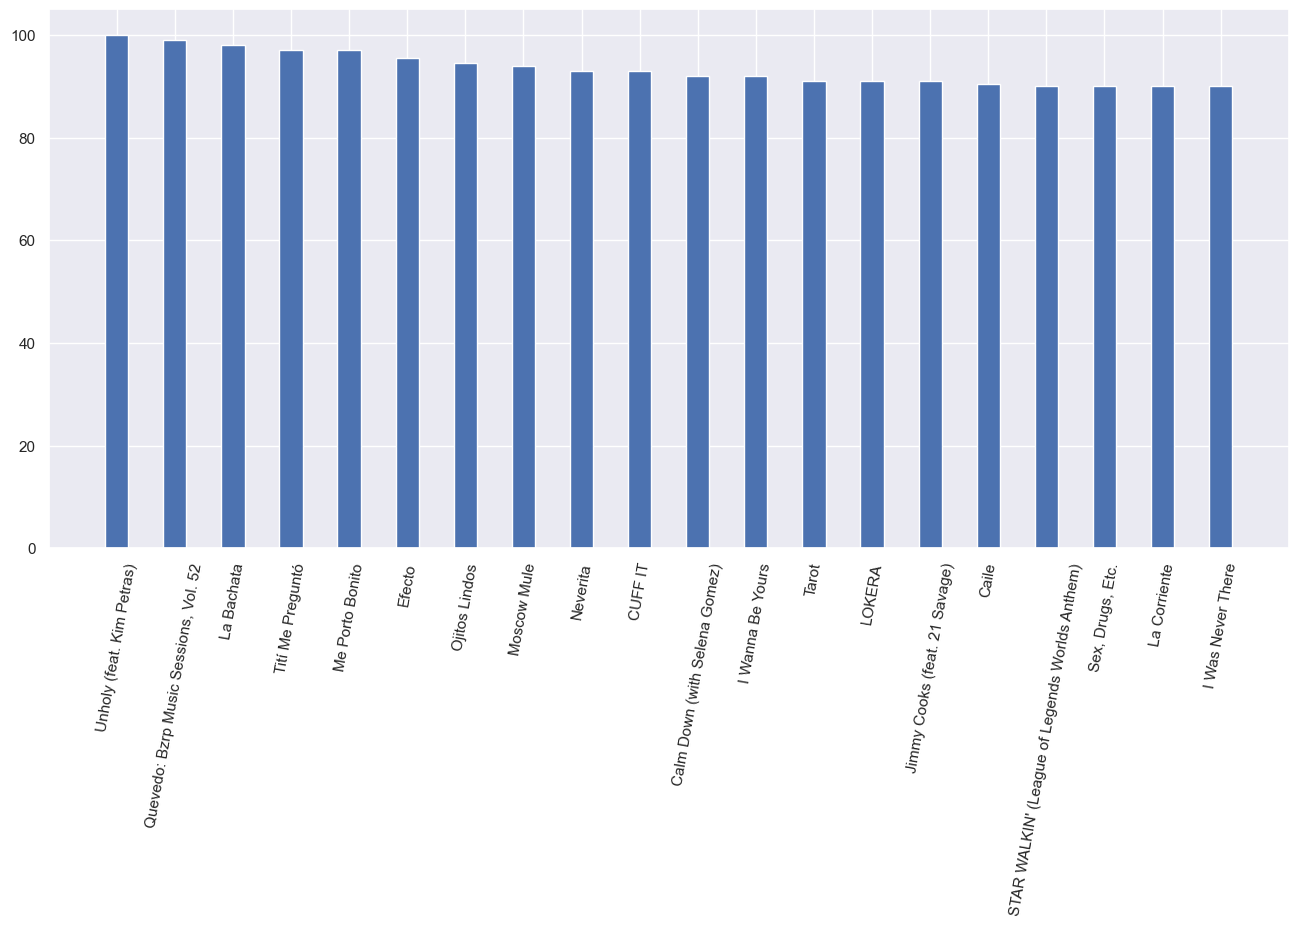

In [18]:
fig, axis = plt.subplots(figsize = (16,7))
axis = plt.bar(top_ten_tracks.index, top_ten_tracks, width=0.4)
plt.xticks(rotation = 80);

* un vistazo mas de cerca a las pistas mas populares en forma grafica 

In [19]:
top_ten_artists = data.groupby("artists")['popularity'].sum().sort_values(ascending=False).head(20)
top_ten_artists.head(20)

artists
The Beatles              17021
Linkin Park              12560
BTS                      10358
Prateek Kuhad            10054
Elvis Presley             9307
Arctic Monkeys            8461
Charlie Brown Jr.         7136
Red Hot Chili Peppers     6540
CoComelon                 6023
Rammstein                 5825
Håkan Hellström           5762
my little airport         5680
OneRepublic               5586
Nirvana                   5546
Glee Cast                 5399
Anupam Roy                5149
Cigarettes After Sex      4972
Pink Floyd                4964
Adele                     4961
Jay Chou                  4856
Name: popularity, dtype: int64

* Estos son los 20 artistas mas populares en Spotify 

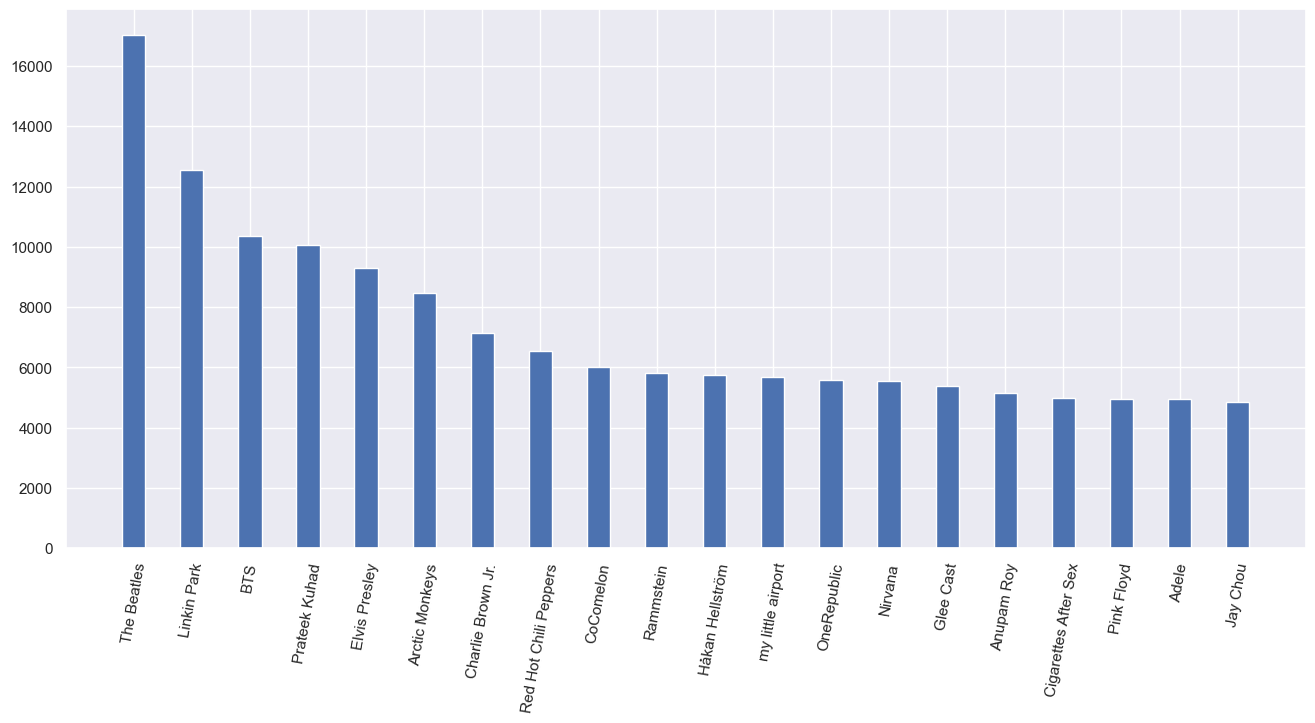

In [20]:
fig, axis = plt.subplots(figsize = (16,7))
axis = plt.bar(top_ten_artists.index, top_ten_artists, width=0.4)
plt.xticks(rotation = 80);

* Vista grafica de los 20 artitas mas populares 

In [21]:
top_ten_album = data.groupby("album_name")['popularity'].sum().sort_values(ascending=False).head(10)
top_ten_album.head(10)

album_name
Un Verano Sin Ti                               5048
OzuTochi                                       4286
Greatest Hits                                  3426
Acústico (Ao Vivo)                             3276
Awake                                          3005
Return of the Dream Canteen                    2874
ASOT 1090 - A State Of Trance Episode 1090     2670
1 (Remastered)                                 2381
Hamilton (Original Broadway Cast Recording)    2374
Ao Vivo                                        2317
Name: popularity, dtype: int64

* Estos son los albunes mas populares

In [22]:
top_ten_genre = data.groupby("track_genre")['popularity'].sum().sort_values(ascending=False).head(10)
top_ten_genre.head(10)

track_genre
pop-film     59283
k-pop        56896
chill        53651
sad          52379
grunge       49594
indian       49539
anime        48772
emo          48128
sertanejo    47866
pop          47576
Name: popularity, dtype: int64

* Los generos mas populares 

In [23]:
data.corr()['popularity']

C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\3675084118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['popularity']


Unnamed: 0          0.032142
popularity          1.000000
explicit            0.044082
danceability        0.035448
energy              0.001056
key                -0.003853
loudness            0.050423
mode               -0.013931
speechiness        -0.044927
acousticness       -0.025472
instrumentalness   -0.095139
liveness           -0.005387
valence            -0.040534
tempo               0.013205
time_signature      0.031073
duration_min       -0.007165
Name: popularity, dtype: float64

* Estas son las características que están altamente correlacionadas con la popularidad : **

In [24]:
#hacemos una seleccion de funciones basadas en la correlacion SEMI AUTOMATICA
cor_target = abs(data.corr()["valence"])

#Hacemos una seleccion de caracteristicas altamente correlacionadas

relevant_features = cor_target[cor_target> 0.1]
feature_cols = relevant_features.keys().to_list()
feature_cols

C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\3405218740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_target = abs(data.corr()["valence"])


['danceability',
 'energy',
 'loudness',
 'acousticness',
 'instrumentalness',
 'valence',
 'time_signature',
 'duration_min']

In [25]:
#Preparamos un conjunto de datos para entrenarlos

df = data[feature_cols]
df = df[~df.duplicated()==1]
df.head()

,danceability,energy,loudness,acousticness,instrumentalness,valence,time_signature,duration_min
0,0.676,0.4610,-6.746,0.0322,0.000001,0.715,4,3.8
1,0.420,0.1660,-17.235,0.9240,0.000006,0.267,4,2.5
2,0.438,0.3590,-9.734,0.2100,0.000000,0.120,4,3.5
3,0.266,0.0596,-18.515,0.9050,0.000071,0.143,3,3.4
4,0.618,0.4430,-9.681,0.4690,0.000000,0.167,4,3.3


## DATOS SEPARADOS PARA ENTRENAMIENTO SEGUN SUS CORRELACIONES POSITIVAS

In [26]:
#Usaremos la columna de VALENCE y Separamos 80% test y 20%train

X_train, X_test, y_train, y_test = train_test_split(df.drop('valence', axis=1), df['valence'], test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(66730, 7) (16683, 7) (66730,) (16683,)


In [27]:
data['valence'].describe()

count    114000.000000
mean          0.474068
std           0.259261
min           0.000000
25%           0.260000
50%           0.464000
75%           0.683000
max           0.995000
Name: valence, dtype: float64

In [28]:
pd.isnull(data["valence"]).values.ravel().sum()

0

----

## CONJUNTO DE ENTRENAMIENTO Y DE TESTING

In [29]:
from sklearn.model_selection import train_test_split
import sklearn
a = data["valence"]

In [30]:
train , test = train_test_split (data["valence"], test_size=0.30)
len(train) , len(test)

a = sklearn.utils.shuffle(a) # abarajamor los datos

In [31]:
cut_id = int(0.80*len(a))
train_data = a [:cut_id]

test_data = a[cut_id+1:]
test_data

C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\2169096186.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_data = a [:cut_id]
C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\2169096186.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_data = a[cut_id+1:]


29494     0.398
11276     0.175
92601     0.809
54924     0.136
72730     0.353
          ...  
68748     0.803
744       0.849
66760     0.289
55524     0.154
111905    0.669
Name: valence, Length: 22799, dtype: float64

In [32]:
len(train_data),len(test_data)

(91200, 22799)

In [33]:
#Hacemos un mini dataset con las 6 columnas que importan
subset = data[["popularity","tempo","key","mode","energy","loudness","valence","danceability"]]
subset.head()

subset_cov = subset.cov()
subset_cov.loc["danceability","valence"]

0.02147688467079597

In [34]:
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import statsmodels.formula.api as smf


#aca creamos un modelo lineal
# llamamos a la funcion OLS(fomrula y agregamos que columnas queremos averiguar ) y en cual datasets luego otra funcion llamada fit()para que se ajusten sus parametros y condicciones
lm = smf.ols(formula = "danceability~valence", data = data).fit()
lm.params

Intercept    0.415326
valence      0.319519
dtype: float64

* intercep seria A(alfa) y B(beta) seria "loudness"
* **tiene un incremento de 3.8 de popularidad cada tema que contenga energy y loudness compatibles**

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                 3.364e+04
Date:                Fri, 30 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:37:41   Log-Likelihood:                 52633.
No. Observations:              114000   AIC:                        -1.053e+05
Df Residuals:                  113998   BIC:                        -1.052e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4153      0.001    441.227      0.000       0.413       0.417
valence        0.3195      0.002    183.412      0.000       0.316       0.323
==============================================================================
Omnibus:                      503.157   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.556
Skew:                          -0.065   Prob(JB):                     2.85e-87
Kurtosis:                       2.741   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print("tiene un R2 ajustado de", lm.rsquared_adj)

tiene un R2 ajustado de 0.2278478816064189


In [37]:
data.describe()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,3.800492
std,32909.109681,22.305078,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,1.788431
min,0.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,2.900000
50%,56999.500000,35.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,3.500000
75%,85499.250000,50.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,4.400000
max,113999.000000,100.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.300000


In [38]:
#Trataremos de predecir temas segun su sonoridad
valence_pred = lm.predict(pd.DataFrame(data["valence"]))
valence_pred

0         0.643782
1         0.500638
2         0.453669
3         0.461017
4         0.468686
            ...   
113995    0.426158
113996    0.426509
113997    0.652729
113998    0.547288
113999    0.641546
Length: 114000, dtype: float64

In [39]:
valence_pred.describe()

count    114000.000000
mean          0.566800
std           0.082839
min           0.415326
25%           0.498401
50%           0.563583
75%           0.633558
max           0.733248
dtype: float64

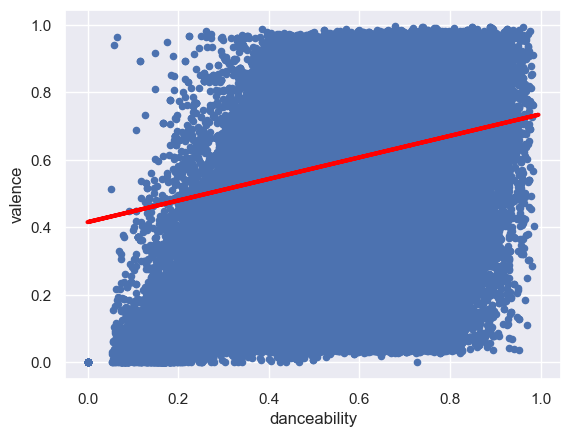

In [40]:
data.plot(kind = "scatter" , x="danceability" , y="valence")
plt.plot(pd.DataFrame(data["valence"]), valence_pred, c="red", linewidth=3)

La línea roja es el modelo lineal que mejor se ajusta y que básicamente se ha obtenido en forma de modelo y los puntitos de color azul que estan dispersos alrededor del mismo son los datos originales que presentaba el Data Set.

In [41]:
#aca añadimos una columnas de las predicciones loudness
data["valence_pred"] =   0.415326 + 0.319519 * data["valence"]


In [42]:
# añadimos una columna para los errores estandar residuales [RSE]
subset["RSE_VALENCE"] = (data["valence"] - data["valence_pred"])**2
subset

C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\483415400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["RSE_VALENCE"] = (data["valence"] - data["valence_pred"])**2


,popularity,tempo,key,mode,energy,loudness,valence,danceability,RSE_VALENCE
0,73,87.917,1,0,0.4610,-6.746,0.7150,0.676,0.005072
1,55,77.489,1,1,0.1660,-17.235,0.2670,0.420,0.054587
2,57,76.332,0,1,0.3590,-9.734,0.1200,0.438,0.111335
3,71,181.740,0,1,0.0596,-18.515,0.1430,0.266,0.101135
4,82,119.949,2,1,0.4430,-9.681,0.1670,0.618,0.091014
...,...,...,...,...,...,...,...,...,...
113995,21,125.995,5,1,0.2350,-16.393,0.0339,0.172,0.153866
113996,22,85.239,0,0,0.1170,-18.318,0.0350,0.174,0.153279
113997,22,132.378,0,0,0.3290,-10.895,0.7430,0.629,0.008149
113998,41,135.960,7,1,0.5060,-10.889,0.4130,0.587,0.018033


In [43]:
# aca utilizamos la funcion para hacer la suma de los cuadrados
SSD = sum(subset["RSE_VALENCE"])
SSD

4528.498931970599

In [44]:
RSE = np.sqrt(SSD / (len(subset)-2))
RSE

#LA DESVIACION TIPICA DE LOS RESIDUOS

0.1993097382484112

In [45]:
# aca hacemos el promedio de las valence
valence_mean = np.mean(subset["valence"])
valence_mean

0.4740682309736842

In [46]:
error = RSE / valence_mean*100

print("el error dejaria de explicar el %",error,"del modelo")


el error dejaria de explicar el % 42.042416096740084 del modelo


## REGRESION LINEAL MULTIPLE 

In [47]:
lm3 = smf.ols(formula = "danceability~valence+energy+time_signature",  data = data).fit()
lm3.params

Intercept         0.194424
valence           0.308477
energy           -0.008759
time_signature    0.059363
dtype: float64

In [48]:
lm3.rsquared_adj

0.24892043778701656

In [49]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                 1.259e+04
Date:                Fri, 30 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:37:47   Log-Likelihood:                 54211.
No. Observations:              114000   AIC:                        -1.084e+05
Df Residuals:                  113996   BIC:                        -1.084e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1944      0.004     47.797      0.000       0.186       0.202
valence            0.3085      0.002    172.716      0.000       0.305       0.312
energy            -0.0088      0.002     -4.716      0.000      -0.012      -0.005
time_signature     0.0594      0.001     56.406      0.000       0.057       0.061
==============================================================================
Omnibus:                      483.552   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.971
Skew:                          -0.063   Prob(JB):                     4.19e-84
Kurtosis:                       2.745   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#creamos una lista de predicciones para loudness y tempo
dance_valance_ener = lm3.predict(data[["danceability","valence","energy","time_signature"]])
dance_valance_ener

0         0.648399
1         0.512785
2         0.465748
3         0.416103
4         0.479511
            ...   
113995    0.499638
113996    0.441647
113997    0.658192
113998    0.554844
113999    0.646012
Length: 114000, dtype: float64

In [51]:
#aqui calculamos la suma de los cuadrados de las diferencias **SSD**

SSD = sum((data["danceability"] - dance_valance_ener)**2)
SSD

2578.609761817846

In [52]:
#aqui sacamos la desviacion tipica de los residuos **RSE** / ponemos -2 -1 al final por que son las variables predictoras 
# en este caso seria 2 variables predictoras - 1 
RSE = np.sqrt(SSD / (len(subset)-2-1))
RSE

0.15039939872952965

In [53]:
# el error dejaria de explicar el %31.72 del modelo
error = RSE / valence_mean*100
print("En este caso con los demas datos y su 'casi buena correacion' el modelo deja de explicar el %",error)

En este caso con los demas datos y su 'casi buena correacion' el modelo deja de explicar el % 31.72526419258801


In [54]:
lm_n = smf.ols(formula= "danceability~valence+energy+time_signature", data = data).fit()
rcuadrado_n = lm_n.rsquared
VIF = 1/(1-rcuadrado_n)
print("las variables no estan correlacionadas",VIF)

las variables no estan correlacionadas 1.3314519087250705


* lo que podemos ver es mejora (no mucho) su correlacion cuando hacemos una **REGRESION LINEAL MULTIPLE** y no una lineal simple

----


# DIVIDIMOS EN CONJUNTO DE ENTRENAMIENTO Y TESTING

(array([4.0000e+00, 1.1600e+02, 1.6700e+03, 1.0709e+04, 3.1173e+04,
        3.9842e+04, 2.3587e+04, 6.1360e+03, 7.3400e+02, 2.9000e+01]),
 array([-4.9314846 , -4.00652779, -3.08157099, -2.15661418, -1.23165737,
        -0.30670056,  0.61825625,  1.54321306,  2.46816987,  3.39312667,
         4.31808348]),
 <BarContainer object of 10 artists>)

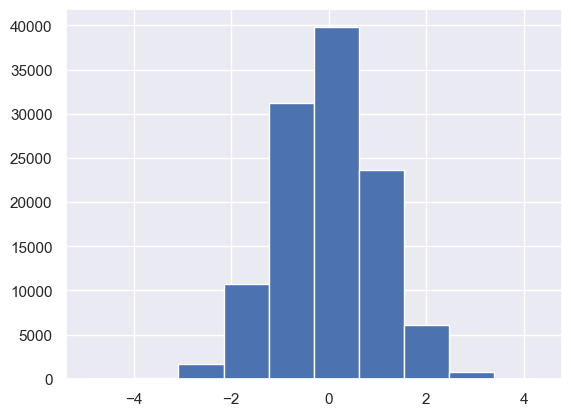

In [55]:
a = np.random.randn(len(subset))
plt.hist(a)

In [56]:
check = (a<0.8)
trainig = data[check]
testing = data[~check]
len(trainig) , len(testing)

(89923, 24077)

In [57]:
#creamo un modelo con el que mejor funcion "RADIO Y TV"
lm5 = smf.ols(formula="danceability~valence+energy+time_signature", data=trainig).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     9947.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:37:49   Log-Likelihood:                 42858.
No. Observations:               89923   AIC:                        -8.571e+04
Df Residuals:                   89919   BIC:                        -8.567e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1945      0.005     42.317      0.000       0.186       0.204
valence            0.3084      0.002    153.535      0.000       0.304       0.312
energy            -0.0079      0.002     -3.761      0.000      -0.012      -0.004
time_signature     0.0592      0.001     49.805      0.000       0.057       0.062
==============================================================================
Omnibus:                      365.103   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.669
Skew:                          -0.060   Prob(JB):                     7.62e-64
Kurtosis:                       2.749   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Tenemos un R-cuadrador ajustado de 0.250 (bastante bajo)
    * **sirve para reflejar la bondad del ajuste de un modelo a la variable que se pretende explicar.**
* tenemos un F statistic alto, pero una probabilidad baja de casi 0
* los P-Valores bajos (eso es medianamente bueno, pero de nada sirve)
* lo estadisticos T son elevados todos menos el de "energy" que es negativos y seria bueno quitarlo asi el Estadistico F sube considerablemente
* el coeficiente elevado y bueno es solamente el de "valence" y muy por debajo del "time_signature" 

# Validacion del modelo con el conjunto de testing

In [58]:
valence_predict1 = lm.predict(testing)
valence_predict1

0         0.643782
2         0.453669
8         0.629084
9         0.477952
39        0.472840
            ...   
113986    0.427500
113989    0.481147
113992    0.551761
113993    0.537383
113995    0.426158
Length: 24077, dtype: float64

In [59]:
SSD = sum((testing["valence"] - valence_predict1)**2)
RSE = np.sqrt(SSD / (len(testing)-2-1))

valence_mean = np.mean(testing["valence"])
error = RSE / valence_mean*100


print("SSD =",SSD,"RSE =",RSE,"ERROR =",error)

SSD = 961.0605008033623 RSE = 0.19980264633608122 ERROR = 42.22416701522952


* el resultado que me da ahora es del %42.177 SUBIO UN 10% mas de diferencia con respecto al modelo creado anteriormente 


* si el RSE es muy bajo


* **en resumen, cuando el ESTADISTICO F sea alto - el P-VALOR tenga los ultimos numero alto - y el margen ERROR muy bajo en el porcentaje. mejor es el modelo basicamente...**

In [60]:
subset_1 = data[["danceability","valence","energy","time_signature"]]
subset_1.head()

,danceability,valence,energy,time_signature
0,0.676,0.715,0.4610,4
1,0.420,0.267,0.1660,4
2,0.438,0.120,0.3590,4
3,0.266,0.143,0.0596,3
4,0.618,0.167,0.4430,4


In [61]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [62]:
feature_cols = ["danceability","valence","energy","time_signature"]

X = subset_1[feature_cols]
Y = subset_1["valence"]

In [63]:
#creamos un estimador (SVR) indicando en el kernel que queremos crear y estimar un modelo lineal  
estimator = SVR(kernel="linear")

#creamos un selector con el stimador de arriba e indicamos con cuantas varibales predictivas nos quedamos, en este caso 2 
selector = RFE(estimator, n_features_to_select=2, step=1) #el step es para que lo vaya haciendo de a uno 

#hacemos otro selector para que cree el modelos con las X e Y que especificamos anteriormente
selector = selector.fit(X,Y)

In [64]:
selector.support_

array([ True,  True, False, False])

In [65]:
selector.ranking_

array([1, 1, 2, 3])

lo que hacemos aqui arriba es ver con cuales de las variables predictoras eligio para crear el modelo (cuales son los mejores)

In [66]:
#importamos para crear la regresion lineal, una vez que tengamos los datos de las varibles

from sklearn.linear_model import LinearRegression

x_pred = X[["danceability","valence"]]

In [67]:
#creamos una varibales para indicar que haga una regresion lineal con las variables predictoras 
lm = LinearRegression()
lm.fit(x_pred, Y)

LinearRegression()

In [68]:
lm.intercept_

2.220446049250313e-16

aqui le pedimos que indique donde corta el eje = ALPHA

In [69]:
lm.coef_

array([-2.67886515e-15,  1.00000000e+00])

Estos son los coeficientes de Danceability & valence

In [70]:
lm.score(x_pred, Y)

1.0

* aca podemos predecir el Rcuadrado del modelo.

* **R cuadrado** sirve para reflejar la bondad del ajuste de un modelo a la variable que se pretende explicar."QUE NOS DA EN ESTE CASO PERFECTO" = 100% efectividad


-----


# Vriables categoricas (generos)

In [71]:
subset_genre = data[["track_genre"]]
subset_genre.head()

,track_genre
0,acoustic
1,acoustic
2,acoustic
3,acoustic
4,acoustic


In [72]:
#AHORA CREAREMOS OTRO DUMMY DATASET DE SI LA MUSICA ES EXPLICITA O NO
#ES DECIR SI ES APTA PARA NIÑ@S O NO

dummy_explicit = pd.get_dummies(data["explicit"] , prefix ="explicit")
dummy_explicit.head()

,explicit_False,explicit_True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [73]:
dummy_genre = pd.get_dummies(subset_genre["track_genre"] , prefix="genre") 

dummy_genre = pd.concat([dummy_genre,dummy_explicit], axis = 1)
dummy_genre.head()

,genre_acoustic,genre_afrobeat,genre_alt-rock,genre_alternative,genre_ambient,genre_anime,genre_black-metal,genre_bluegrass,genre_blues,genre_brazil,...,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music,explicit_False,explicit_True
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
x = dummy_genre
y = data["popularity"]

In [75]:
lm6 = LinearRegression()
lm6.fit(x,y)

LinearRegression()

In [76]:
print(lm6.intercept_)

1003941839436.6873


In [77]:
list(zip(dummy_genre, lm6.coef_))

[('genre_acoustic', -1014097401500.1785),
 ('genre_afrobeat', -1014097401517.5293),
 ('genre_alt-rock', -1014097401508.3584),
 ('genre_alternative', -1014097401518.6416),
 ('genre_ambient', -1014097401498.274),
 ('genre_anime', -1014097401493.2628),
 ('genre_black-metal', -1014097401520.0757),
 ('genre_bluegrass', -1014097401516.866),
 ('genre_blues', -1014097401510.8293),
 ('genre_brazil', -1014097401497.8385),
 ('genre_breakbeat', -1014097401522.3588),
 ('genre_british', -1014097401498.6653),
 ('genre_cantopop', -1014097401507.3645),
 ('genre_chicago-house', -1014097401529.8398),
 ('genre_children', -1014097401506.9996),
 ('genre_chill', -1014097401489.091),
 ('genre_classical', -1014097401528.8971),
 ('genre_club', -1014097401508.9681),
 ('genre_comedy', -1014097401519.5485),
 ('genre_country', -1014097401525.0737),
 ('genre_dance', -1014097401520.0387),
 ('genre_dancehall', -1014097401509.7776),
 ('genre_death-metal', -1014097401510.5854),
 ('genre_deep-house', -1014097401497.5852)

In [78]:
#Comprobamos que tan bueno es el modelo
lm6.score(x,y)

0.2553027184886921

* el resultado que nos da es medio bajo, un **25%** - puede ser por que no usamos toda la informacion que tenemos o puede pasar si esta imcompleto

* a la vista esta que no es muy bueno hacer un modelo predictivo con las variables categoricas que contiene el DF

In [79]:
contigency_table = pd.crosstab(dummy_explicit["explicit_True"], dummy_explicit["explicit_False"])
contigency_table

explicit_False,0,1
explicit_True,,
0,0,104253
1,9747,0


* tenemos 104253 canciones no explicitas y 9747 explicitas (el 8,5% de las canciones)

In [80]:
pm = 9474 / 104253
pm/(1-pm)

0.0999588516443516

In [81]:
total_data = pd.concat([subset,dummy_explicit], axis=1)
total_data

,popularity,tempo,key,mode,energy,loudness,valence,danceability,RSE_VALENCE,explicit_False,explicit_True
0,73,87.917,1,0,0.4610,-6.746,0.7150,0.676,0.005072,1,0
1,55,77.489,1,1,0.1660,-17.235,0.2670,0.420,0.054587,1,0
2,57,76.332,0,1,0.3590,-9.734,0.1200,0.438,0.111335,1,0
3,71,181.740,0,1,0.0596,-18.515,0.1430,0.266,0.101135,1,0
4,82,119.949,2,1,0.4430,-9.681,0.1670,0.618,0.091014,1,0
...,...,...,...,...,...,...,...,...,...,...,...
113995,21,125.995,5,1,0.2350,-16.393,0.0339,0.172,0.153866,1,0
113996,22,85.239,0,0,0.1170,-18.318,0.0350,0.174,0.153279,1,0
113997,22,132.378,0,0,0.3290,-10.895,0.7430,0.629,0.008149,1,0
113998,41,135.960,7,1,0.5060,-10.889,0.4130,0.587,0.018033,1,0


In [82]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


total_data_vars = total_data.columns.values.tolist()

Y = ["popularity"]
X = [v for v in total_data if v not in Y ]

In [83]:
lr = LogisticRegression(solver="liblinear")
rfe = RFE (lr)
rfe = rfe.fit(total_data[X],total_data[Y].values.ravel())

In [84]:
print(rfe.ranking_)

[6 5 3 2 4 1 1 1 1 1]


In [85]:
z = zip(total_data_vars, rfe.ranking_)
list(z)

[('popularity', 6),
 ('tempo', 5),
 ('key', 3),
 ('mode', 2),
 ('energy', 4),
 ('loudness', 1),
 ('valence', 1),
 ('danceability', 1),
 ('RSE_VALENCE', 1),
 ('explicit_False', 1)]

In [86]:
cols = ["explicit_False","danceability","valence","loudness","mode"]
X = total_data[cols]
Y = total_data["popularity"]

from sklearn import linear_model

In [87]:
#logit_model = sm.Logit(Y,X)
#result = logit_model.fit()

logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
#verificamos si tenemos datos nulos
total_data.isnull().any(axis=1).sum()


0

In [89]:
logit_model.score(X,Y)

0.14051754385964912

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_training , X_test , Y_training , Y_test = train_test_split(X,Y,test_size=0.3, random_state=0) 


In [92]:
lm = linear_model.LogisticRegression()

lm.fit(X_training,Y_training)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
probs = lm.predict_proba(X_test)
probs

array([[1.30071338e-01, 1.78550276e-02, 7.86399651e-03, ...,
        2.58984823e-07, 4.06104382e-09, 6.34219980e-09],
       [1.27574129e-01, 8.82876956e-03, 4.21780645e-03, ...,
        4.02688734e-07, 7.46868901e-09, 1.14037896e-08],
       [1.19855972e-01, 1.16475836e-02, 3.92544983e-03, ...,
        1.05637131e-08, 5.10677889e-11, 9.04868425e-11],
       ...,
       [9.79170623e-02, 3.07669273e-03, 1.14784885e-03, ...,
        4.26363183e-17, 6.41434345e-23, 2.77626015e-22],
       [1.67437342e-01, 2.21846866e-02, 8.92815470e-03, ...,
        3.56286703e-08, 2.85646665e-10, 4.71732142e-10],
       [1.28285773e-01, 1.61285784e-02, 6.07730751e-03, ...,
        2.01150949e-07, 3.24606953e-09, 5.01347002e-09]])

In [94]:
#si vemos es un array con 0 y 1 (osea si da 1 es TRUE y si da 0 es FALSE) 
#Obviamente salen pocos 1 por que solamente era el 10% los que compraron (osea los que tienen + de 0.50)
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
#ahora creo una variable para quedarme solamente con la segunda columna (que tiene los que compraron y los que no)
prob = probs[:,1]

In [96]:
#aca lo transformamos en un data frame
prob_df = pd.DataFrame(prob)

#creamos un threshold para luego ir variando los resultado
threshold = 0.03

#decimos que la prediccion haga un where y que los valores del data frame sea superior al threshold sea 1(compra) y sino que sea 0 (no compra)
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1 , 0) 
prob_df.head()

,0,prediction
0,0.017855,0
1,0.008829,0
2,0.011648,0
3,0.018435,0
4,0.026207,0


In [97]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,33326
1,874


In [98]:
268/len(prob_df)*100

0.783625730994152

LA PROBABILIDAD DE QUE UN TEMA SEA POPULAR ENTRE 34000 ES DE 7,8%

In [99]:
268/len(prob_df)*100

0.783625730994152

In [100]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model.LogisticRegression(), X ,Y , cv=18) 
scores

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=18.
  warnings.warn(
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of

array([0.14051153, 0.14003789, 0.14051153, 0.14051153, 0.14051153,
       0.14051153, 0.14053371, 0.14053371, 0.14037581, 0.14053371,
       0.14053371, 0.14053371, 0.14053371, 0.14053371, 0.14053371,
       0.14053371, 0.14053371, 0.14053371])

* Hacemos una validacion cruzada para ver como se porta el modelo

In [101]:
scores.mean()*100
#El promedio de las 18 ejecuciones distintas

14.049123115676032

In [102]:
data_arbol = data[["popularity", "energy","key","danceability"]]
data_arbol.head()

,popularity,energy,key,danceability
0,73,0.4610,1,0.676
1,55,0.1660,1,0.420
2,57,0.3590,0,0.438
3,71,0.0596,0,0.266
4,82,0.4430,2,0.618


In [103]:
colnames = data_arbol.columns.values.tolist()
predictors = colnames[:4]
target =colnames[3]

X = data_arbol[predictors]
Y = data_arbol[target]

from sklearn.tree import DecisionTreeRegressor

In [104]:
regtree = DecisionTreeRegressor(min_samples_split=100 , min_samples_leaf=50, max_depth=7, random_state=0)

In [105]:
regtree.fit(X,Y)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=50, min_samples_split=100,
                      random_state=0)

In [106]:
preds = regtree.predict(data_arbol[predictors])

In [107]:
data_arbol["preds"] = preds

C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\301976219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arbol["preds"] = preds


In [108]:
data_arbol[["preds","danceability"]]

,preds,danceability
0,0.674041,0.676
1,0.417451,0.420
2,0.440441,0.438
3,0.268641,0.266
4,0.615946,0.618
...,...,...
113995,0.177331,0.172
113996,0.177331,0.174
113997,0.630511,0.629
113998,0.587057,0.587


In [109]:
from sklearn.tree import export_graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

* lo que podremos ahora es crear el arbol de forma grafica para obvservar si hay valores iguales o similares a la predicción. si el valor real a la prediccion se separan mucho o no


* Se supone que el modelo se ha creado en base a un árbol y que la variable a predecir en un modelo de regresión,en un mismo árbol de regresión no es más que el promedio de las variables de salida de las observaciones que caen dentro de un nodo en particular. 


* Por tanto todas lo que son observaciones que caen dentro del mismo modo tendrán la misma predicción como valor de salida 


* Los valores que estan repetidos es por que caen dentro de la misma rama del árbol.

In [110]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv=cv , n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[-3.44384247e-06 -3.58637094e-06 -3.55500677e-06 -3.57981528e-06
 -3.65759834e-06 -3.67045501e-06 -3.61365634e-06 -3.46816784e-06
 -3.66688253e-06 -3.52862394e-06]
-3.577041946329464e-06


* Aca tenemos todas y cada una de las "scores" llevadas a cabo por la validación del error cuadrado promedio
* Luego abajo de todo tenemos el GLOBAL 
    * Que quiere decir que el error promedio puede ser de 3.5Pts hacia arriba y 3.5Pts hacia abajo **EN LA PREDICCION**

el método cross_validation_Predict que hemos utilizado para hacer la predicción en este caso (cross_validation_score) un módulo que permite predecir los valores de las variables de salida de las predicciones a partir de un modelo de validación cruzada


In [111]:
#las variables mas importantes a predecir
list(zip(predictors,regtree.feature_importances_))

[('popularity', 0.0), ('energy', 0.0), ('key', 0.0), ('danceability', 1.0)]

In [112]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_jobs=2 , oob_score=True , n_estimators=500)
forest.fit(X,Y)

RandomForestRegressor(n_estimators=500, n_jobs=2, oob_score=True)

In [113]:
data_arbol["rforest_pred"] = forest.oob_prediction_
data_arbol[["rforest_pred" , "danceability"]]

C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\3570247854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arbol["rforest_pred"] = forest.oob_prediction_


,rforest_pred,danceability
0,0.676,0.676
1,0.420,0.420
2,0.438,0.438
3,0.266,0.266
4,0.618,0.618
...,...,...
113995,0.172,0.172
113996,0.174,0.174
113997,0.629,0.629
113998,0.587,0.587


In [114]:
    #ERROR CUADRATICO MEDIO
data_arbol["rforest_error2"] = (data_arbol["rforest_pred"] - data_arbol["danceability"])**2 #hacemos esta resta al cuadrado
sum(data_arbol["rforest_error2"]) / len(data_arbol) #Sumamos para obtener el resultado 

C:\Users\Acer\AppData\Local\Temp\ipykernel_15388\3598528160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arbol["rforest_error2"] = (data_arbol["rforest_pred"] - data_arbol["danceability"])**2 #hacemos esta resta al cuadrado


2.4328965408483824e-10

* este es el resultado del error en el random forest 2.676 con 500 arboles. esto significa que el error cuadrado es de 2.76pts muy bajo.

In [115]:
forest.oob_score_

0.9999999919217483

* Como vemos obtenemos un **ATRIBUTO QUE ES SIMILAR AL COEFICIENTE DE DETERMINACION**. el resultado es de 0.9999... con 500 arboles creados, es casi excelente (el coeficiente de determinacion se define entre -1 y 1)
    * es casi perfecta la eficacia de la regresion